In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
ls ./drive/MyDrive/CS_766_Project/Project

animal_detection.ipynb  MyDataset/  pothole-detection_2.ipynb  pothole_detection.ipynb


In [5]:
# Check images
img = cv2.imread("./drive/MyDrive/CS_766_Project/Project/MyDataset/train/Pothole/1.jpg")

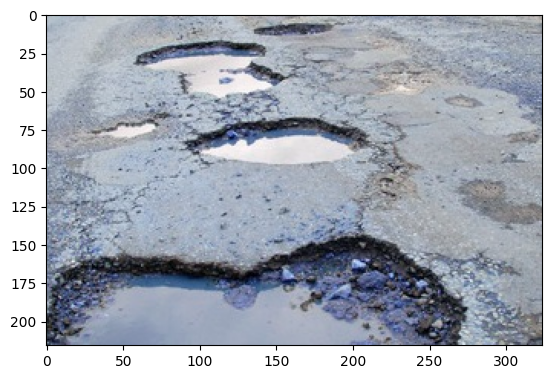

In [7]:
plt.imshow(img)

In [9]:
img.shape

(216, 324, 3)

In [10]:
# Data agumentation on train and test

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# create dataset train
training_set = train_datagen.flow_from_directory("./drive/MyDrive/CS_766_Project/Project/MyDataset/train",
                                                 target_size = (300, 300),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

Found 693 images belonging to 3 classes.


In [12]:
# Create test data set
test_set = test_datagen.flow_from_directory("./drive/MyDrive/CS_766_Project/Project/MyDataset/test",
                                            target_size = (300, 300),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 79 images belonging to 3 classes.


In [13]:
# Model creation with changes

model = VGG16(input_shape=(300,300,3),include_top=False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(3, activation='softmax')(newModel)

model = Model(inputs=model.input, outputs=newModel)

58889256/58889256 [==============================] - 1s 0us/step


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [15]:
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(training_set,validation_data=test_set,epochs=10)

Epoch 1/10
16/44 [=========>....................] - ETA: 1:25 - loss: 0.9482 - accuracy: 0.5703

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


44/44 [==============================] - 191s 4s/step - loss: 0.7732 - accuracy: 0.6912 - val_loss: 0.6242 - val_accuracy: 0.7215
Epoch 2/10
44/44 [==============================] - 27s 592ms/step - loss: 0.3966 - accuracy: 0.8745 - val_loss: 0.5629 - val_accuracy: 0.7848
Epoch 3/10
44/44 [==============================] - 27s 617ms/step - loss: 0.3172 - accuracy: 0.8846 - val_loss: 0.4879 - val_accuracy: 0.7722
Epoch 4/10
44/44 [==============================] - 27s 598ms/step - loss: 0.2717 - accuracy: 0.9149 - val_loss: 0.4275 - val_accuracy: 0.7975
Epoch 5/10
44/44 [==============================] - 27s 609ms/step - loss: 0.2198 - accuracy: 0.9365 - val_loss: 0.4711 - val_accuracy: 0.7975
Epoch 6/10
44/44 [==============================] - 29s 655ms/step - loss: 0.2008 - accuracy: 0.9394 - val_loss: 0.4109 - val_accuracy: 0.8101
Epoch 7/10
44/44 [==============================] - 28s 617ms/step - loss: 0.1927 - accuracy: 0.9365 - val_loss: 0.4297 - val_accuracy: 0.8228
Epoch 8/10
4

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

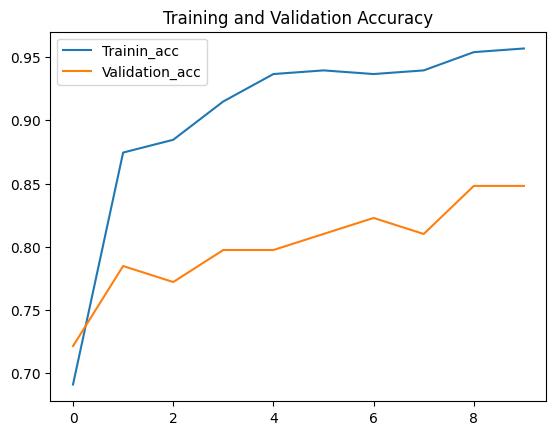

In [18]:
plt.plot(epochs,acc,label='Trainin_acc')
plt.plot(epochs,val_acc,label='Validation_acc')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

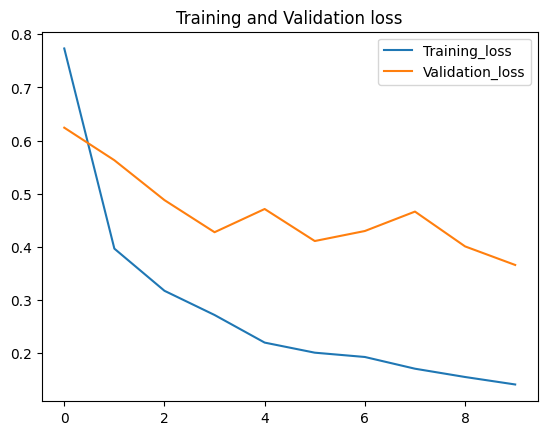

In [19]:
plt.plot(epochs,loss,label='Training_loss')
plt.plot(epochs,val_loss,label='Validation_loss')
plt.legend()
plt.title("Training and Validation loss")

In [20]:
class_dict = {0:'Animal',
              1:'Plain',
              2:'Pothole'}

1/1 [==============================] - 0s 17ms/step
prediction class:  Plain


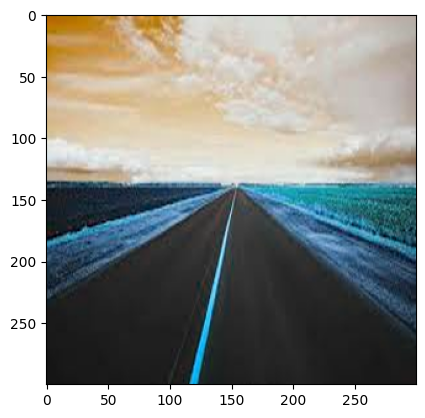

In [26]:
# New Data for testing

file_path =  './drive/MyDrive/CS_766_Project/Project/MyDataset/test/Plain/7.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (300,300),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction class: ',pred_class)

1/1 [==============================] - 0s 29ms/step
prediction class:  Pothole


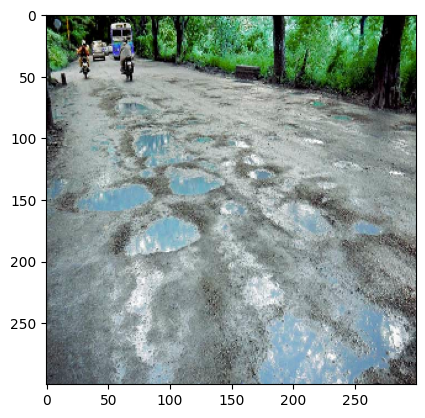

In [24]:
# New Data for testing

file_path =  './drive/MyDrive/CS_766_Project/Project/MyDataset/test/Pothole/2.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (300,300),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction class: ',pred_class)

1/1 [==============================] - 0s 17ms/step
prediction class:  Animal


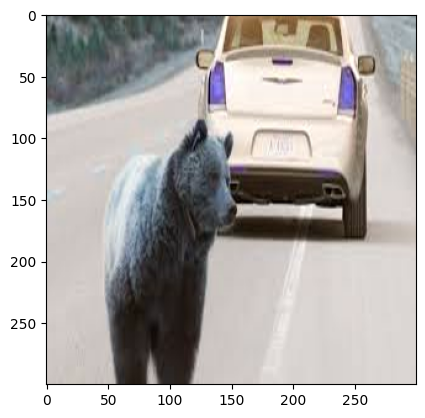

In [25]:
file_path =  './drive/MyDrive/CS_766_Project/Project/MyDataset/test/Animal/98.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (300,300),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction class: ',pred_class)